In [3]:
from all_imports import *

import _modules

%store -r COZIE_MAIN_DF

df = COZIE_MAIN_DF.copy()
df['index_time'] = pd.to_datetime(df['index_time'])
df.set_index('index_time', inplace=True)

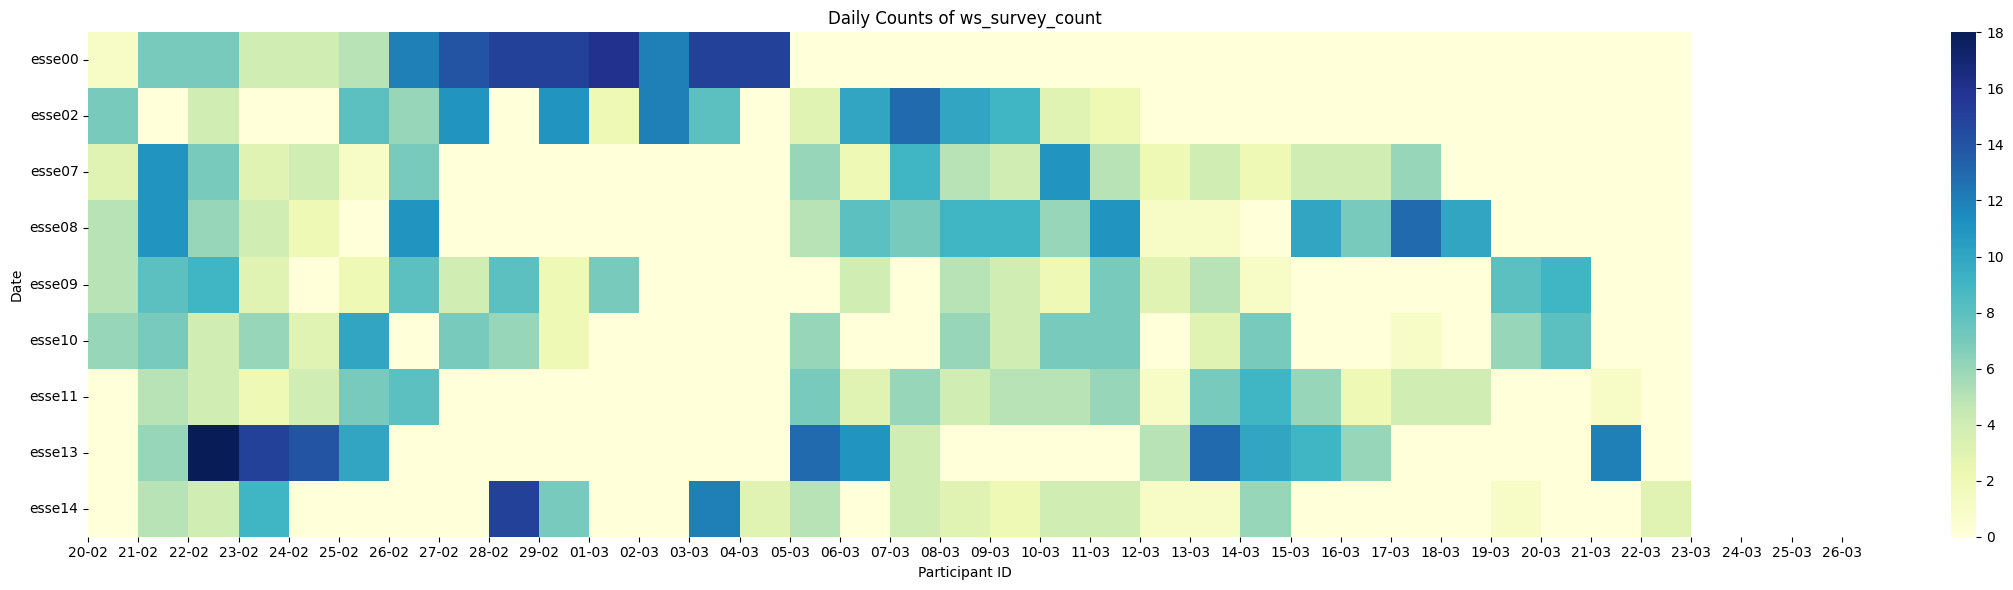

In [19]:

start_date          = '2024-02-20'
end_date            = '2024-03-26'
selected_column     = 'ws_survey_count'

# Filter DataFrame by selected column and date range
filtered_df = df[(df.index >= start_date) & (df.index <= end_date)][['id_participant', selected_column]]
filtered_df = filtered_df.dropna(subset=[selected_column])

# Group by 'id_participant' and 'index_time', and count occurrences
grouped_df = filtered_df.groupby(['id_participant', pd.Grouper(freq='D')]).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(23, 6))
sns.heatmap(grouped_df, cmap='YlGnBu')
# Formatting x-axis ticks to show only day and month
dates = pd.date_range(start_date, end_date)
plt.xticks(ticks=range(len(dates)),  labels=[date.strftime('%d-%m') for date in dates], rotation=0, ha='center')
plt.yticks(rotation=0)

plt.title('Daily Counts of ' + selected_column)
plt.xlabel('Participant ID')
plt.ylabel('Date')
plt.tight_layout()
plt.show()